In [1]:
#loading the data set
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train: ', x_train.shape)
K = len(np.unique(y_train)) # Classes
Ntr = x_train.shape[0]
Nte = x_test.shape[0]
Din = 3072 # CIFAR10
# Din = 784 # MINIST
# Normalize pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0
mean_image = np.mean(x_train, axis=0)
x_train = x_train - mean_image
x_test = x_test - mean_image
y_train = tf.keras.utils.to_categorical(y_train, num_classes=K)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=K)
x_train = np.reshape(x_train,(Ntr,Din))
x_test = np.reshape(x_test,(Nte,Din))
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train:  (50000, 32, 32, 3)


In [3]:
H=200
std=1e-6
w1 = std*np.random.randn(Din, H)
w2 = std*np.random.randn(H,K)
b1 = np.zeros(H)
b2 = np.zeros(K)
print("w1:", w1.shape)
print("b1:", b1.shape)
print("w2:", w2.shape)
print("b2:", b2.shape)
batch_size = Ntr
#gradient descent
iterations = round(Ntr/batch_size)*300
lr = 1.4e-2
lr_decay=0.999
reg = 5e-6
loss_history = []
train_acc_history = []
val_acc_history = []
seed = 0
rng = np.random.default_rng(seed=seed)
for t in range(iterations):
    #batch_indices=np.random.choice(Ntr,batch_size)
    #x=x_train[batch_indices]
    #=y_train[batch_indices]
    indices = np.arange(Ntr)
    rng.shuffle(indices)
    x=x_train[indices]
    y=y_train[indices]
    # Forward pass
    h=1.0/(1.0+np.exp(-(x.dot(w1)+b1)))
    y_pred=h.dot(w2)+b2
    #print(y_pred)
    loss= 1./batch_size*np.square(y_pred-y).sum() + reg*(np.sum(w1*w1)+np.sum(w2*w2))
    loss_history.append(loss)
    if t%10==0:
        print(t,loss)
    # Backward pass
    dy_pred=1./batch_size*2.0*(y_pred-y)
    #print(x.T.shape,dy_pred.shape)
    dw2=h.T.dot(dy_pred) + reg*w2
    db2=dy_pred.sum(axis=0)
    dh=dy_pred.dot(w2.T)
    dw1=x.T.dot(dh*h*(1-h)) + reg*w1
    db1=(dh*h*(1-h)).sum(axis=0)
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    lr *= lr_decay

w1: (3072, 200)
b1: (200,)
w2: (200, 10)
b2: (10,)
0 0.9999978201658432
10 0.9000000127413799
20 0.9000000095817552
30 0.9000000095635338
40 0.9000000095448397
50 0.9000000095254437
60 0.9000000095051163
70 0.9000000094836254
80 0.9000000094607349
90 0.9000000094361977
100 0.9000000094097593
110 0.900000009381148
120 0.9000000093500784
130 0.9000000093162465
140 0.9000000092793277
150 0.900000009238974
160 0.9000000091948125
170 0.9000000091464415
180 0.9000000090934311
190 0.9000000090353154
200 0.9000000089715962
210 0.9000000089017343
220 0.9000000088251523
230 0.9000000087412282
240 0.9000000086492925
250 0.9000000085486264
260 0.9000000084384588
270 0.9000000083179626
280 0.9000000081862506
290 0.9000000080423729


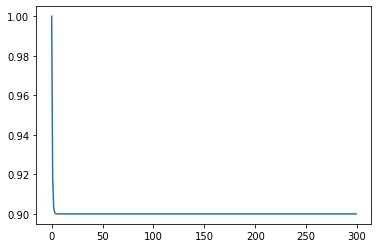

In [6]:
plt.plot(loss_history)

In [5]:
# Printing accuracies
x_t=x_train
y_pred=x_t.dot(w1)+b1

train_acc= 1.0 - 1/Ntr*(np.abs(np.argmax(y_train,axis=1) - np.argmax(y_pred,axis=1))).sum()
print(train_acc)

-81.87276000000001
